## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

*Adaptado do exemplo A-6-19 do livro*: 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}
com:
\begin{align*}
    & N(s) = (s+a) \\
    & D(s) = s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)
\end{align*}

O sistema tem um polo de malha aberta no semi-plano direito e, provavelmente, deve ser apenas *condicionalmente estável*.

Adote-se $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

Neste caso, o sistema é do tipo 1, tendo um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.


In [1]:
# !pip install matplotlib ipympl jupyter

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import sympy as sp
import control as ct
from tbcontrol.symbolic import routh

s = ct.tf([1, 0], [1])

In [3]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Função de transferência de malha aberta

In [10]:

K_l0 = 0.565278996448689
L_0 = ct.tf([0,0.565278996448689,30.6859296349499,89.2837272854508,587.656628795767,301.476638300416],[1,1.00529175074768,25.9486638954737,-36.8092619118405,-44.9393143802965,-18.5583027677834])/K_l0
L_0

TransferFunction(array([5.65278996e-01, 3.06859296e+01, 8.92837273e+01, 5.87656629e+02,
       3.01476638e+02]), array([  0.565279  ,   0.56827031,  14.66823469, -20.80750263,
       -25.40325053, -10.49061876]))

### 2. Determinação dos ganhos críticos via tabela de Routh

In [11]:
s_s = sp.symbols('s')
N_s = sp.Poly(np.poly(ct.zeros(L_0)), s_s)
D_s = sp.Poly(np.poly(ct.poles(L_0)), s_s)
N_s/D_s
N = ct.tf(np.poly(ct.zeros(L_0)),[1])
D = ct.tf(np.poly(ct.poles(L_0)),[1])


In [12]:
K_c = sp.symbols('K_c')
B_s = K_c * N_s + D_s

table_B = routh(B_s)
table_B

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       1.0,                                                   

De fato, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K_c$) se, e somente se: $$K_c < 0.90337226204908848270845329711761$$

### 3. Síntese de um controlador PID via lugar das raízes

#### 3.1. Síntese de um compensador proporcional 

Lugar das raízes de $L(s)$

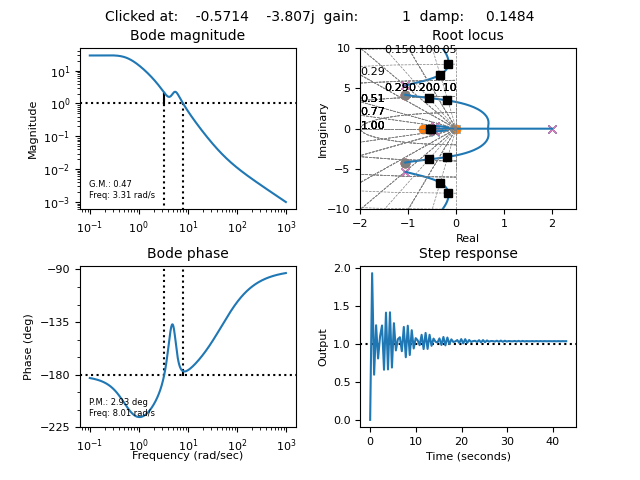

In [15]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-2, 2.5), ylim_rlocus=(-10, 10),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

A partir do lugar das raízes $L(s)$, pode-se escolher como valor inicial para o ganho proporcional $K_p = 0.8$.

#### 3.2. Síntese de um compensador PI

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-integral* (PI), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PI}}(s) = \left( K_p + \frac{K_i}{s} \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} +  K_i \frac{N(s)}{s D(s)} = 0
    \\ 
    & s[D(s) + K_p N(s)] +  K_i N(s) = 0
    \\ 
    & 1 +  K_i \underbrace{\frac{N(s)}{s [D(s) + K_p N(s)]}}_{\displaystyle L_1(s)} = 0
\end{align*}


In [16]:
K_p = 0.8
L_1 = N/(s * (D + K_p * N))
L_1
ct.poles(L_1)



array([-0.20212904+7.37320986j, -0.20212904-7.37320986j,
       -0.43147573+3.70868631j, -0.43147573-3.70868631j,
       -0.5380822 +0.j        ,  0.        +0.j        ])

Lugar das raízes de $L_1(s)$ e ajuste de $K_i$ 

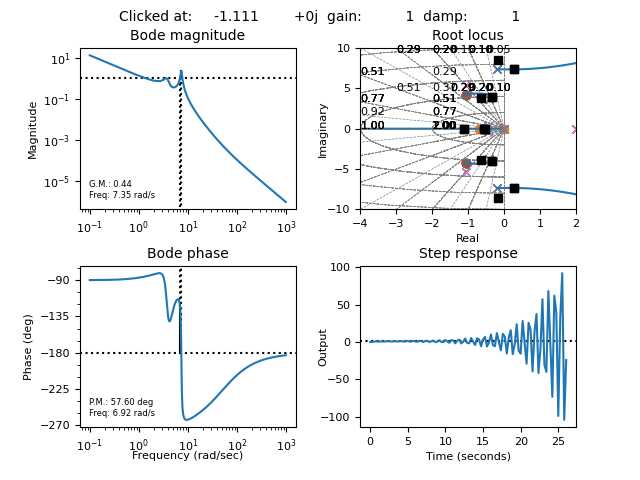

In [20]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-4, 2), ylim_rlocus=(-10, 10),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool

plt.draw()  # desenhar a janela interativa

plt.show()

A partir da análise do lugar das raízes para $L_1(s)$, chega-se a $K_i = 1 \ \text{s}^{-1}$ como escolha razoável para o ganho integral.

Assim pode-se calcular $T_i$ pela expressão:
$$T_i = \frac{K_p}{K_i}$$

In [21]:
K_i =0.2
T_i = K_p/K_i
T_i

4.0

Assumindo os valor calculados para $T_i$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PI}}(s) = K_c \left(1 + \frac{1}{T_i s}\right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s)N(s)}{s T_i D(s)}}_{\displaystyle L_2(s)} = 0
\end{align*}


In [22]:
L_2 = (1 + T_i * s) * N/(s * T_i * D)
L_2

TransferFunction(array([4.00000000e+00, 2.18138297e+02, 6.86069784e+02, 4.31629383e+03,
       3.17288134e+03, 5.33323616e+02]), array([   4.        ,    4.021167  ,  103.79465558, -147.23704765,
       -179.75725752,  -74.23321107,    0.        ]))

Lugar das raízes de $L_2(s)$ e ajuste fino de $K_c$

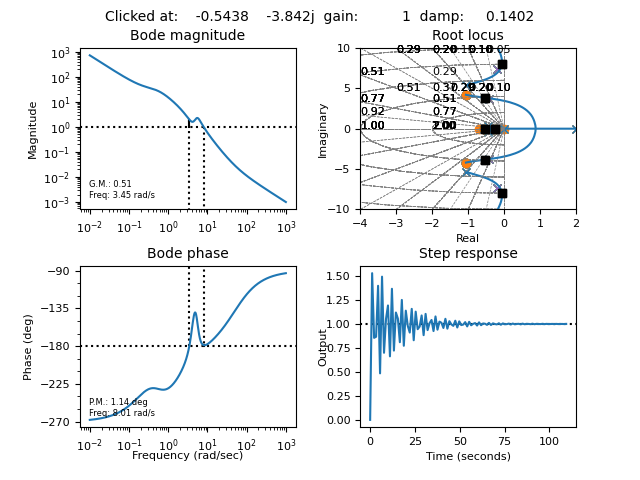

In [25]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-4, 2), ylim_rlocus=(-10, 10),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()


Obtém-se assim $K_c = 9$, o que leva o seguinte compensador PI:

In [72]:
K_c_PI = 14
G_c_PI = K_c_PI * (1 + 1/(T_i * s))
G_c_PI

TransferFunction(array([91., 14.]), array([6.5, 0. ]))

Diagrama de Bode do compensador PID sintetizado

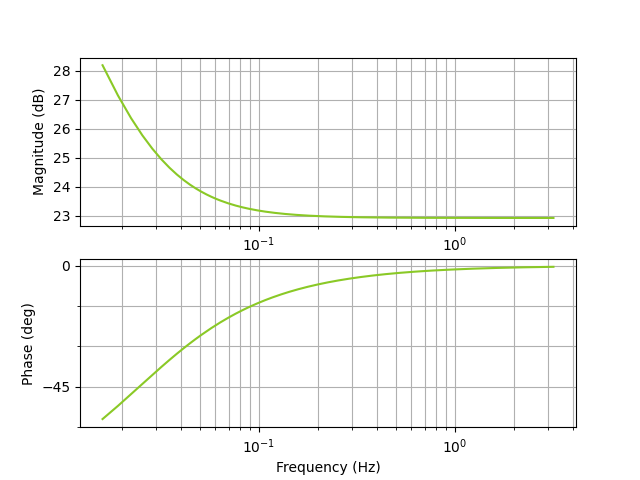

In [73]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PI,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['green'],
                                   dB=True, Hz=True)

#### 3.3. Síntese de um compensador PID

Podemos agora trocar o controlador *proporcional-integral* (PI) por um *proporcional-integral-derivativo* (PID), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PID}}(s) = \left( K_p + \frac{K_i}{s} + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + K_i \frac{N(s)}{s D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & s D(s) + (K_p s + K_i)N(s) + K_d s^2 N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s^2 N(s)}{s D(s) + (K_p s + K_i)N(s)}}_{\displaystyle L_3(s)} = 0
\end{align*}

In [74]:
L_3 = (s * s * N)/(s * D + (K_p * s + K_i) * N)


L_3

TransferFunction(array([1.        , 1.18432892, 5.34342833, 1.51884011, 1.34130257,
       0.        , 0.        ]), array([ 1.        ,  1.2       , 19.07      , 15.09227602, 68.6306262 ,
       27.66837806, 20.47461364,  2.68260514]))

Lugar das raízes de $L_3(s)$ e ajuste de $K_d$

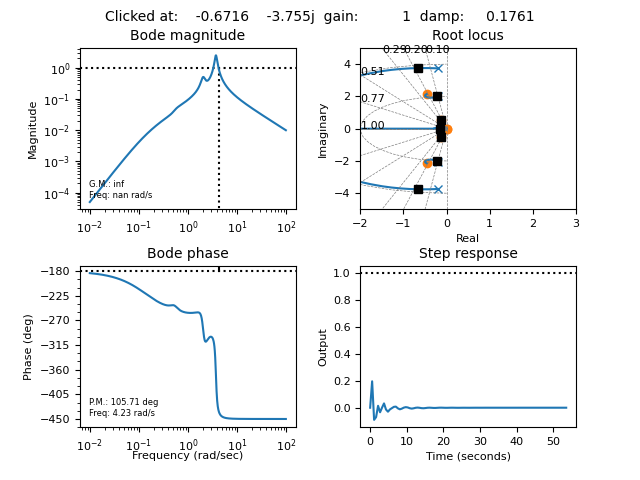

Clicked at     -0.281    +1.912j gain      2.723 damp     0.1454
Clicked at    -0.4697    +1.977j gain      7.916 damp     0.2311
Clicked at     -0.411    +1.891j gain      5.204 damp     0.2124
Clicked at    -0.2726    +1.955j gain      2.196 damp     0.1381
Clicked at    -0.5074    +2.041j gain      12.18 damp     0.2412
Clicked at   -0.07115   +0.5914j gain      3.857 damp     0.1194
Clicked at   -0.01913   +0.6271j gain      2.706 damp    0.03049
Clicked at   -0.04658   +0.6152j gain      3.107 damp     0.0755
Clicked at   -0.09571   +0.5557j gain      6.126 damp     0.1697
Clicked at     -0.105   +0.5471j gain      7.629 damp     0.1884
Clicked at     -0.114   +0.5344j gain      11.32 damp     0.2086
Clicked at    -0.1221   +0.5344j gain      7.186 damp     0.2227
Clicked at    -0.1174   +0.5312j gain      11.49 damp     0.2158
Clicked at    -0.1174   +0.5312j gain      13.29 damp     0.2158
Clicked at    -0.1174   +0.5312j gain      11.49 damp     0.2158
Clicked at    -0.1174   +

In [75]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_3,  ylim_rlocus=(-5, 5),xlim_rlocus=(-2, 3),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

A partir da análise do lugar das raízes para $L_3(s)$, chega-se a $K_d = 110 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [76]:
K_d = 12

T_d = K_d/K_p
T_d

0.9230769230769231

Finalmente, assumindo os valores calculados para $T_i$ e $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PID}}(s) = K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s + T_d T_i s^2)N(s)}{s T_i D(s)}}_{\displaystyle L_4(s)} = 0
\end{align*}


In [77]:
L_4 = ((1 + T_i * s + T_d * T_i * s * s) * N)/(s * T_i * D)
L_4

TransferFunction(array([ 6.        , 13.60597355, 40.75870802, 45.02965374, 23.26370445,
       10.23730682,  1.34130257]), array([  6.5   ,   7.8   ,  39.455 , -14.976 , -20.8169, -17.9621,
         0.    ,   0.    ]))

Lugar das raízes de $L_4(s)$ e ajuste fino de $K_c$

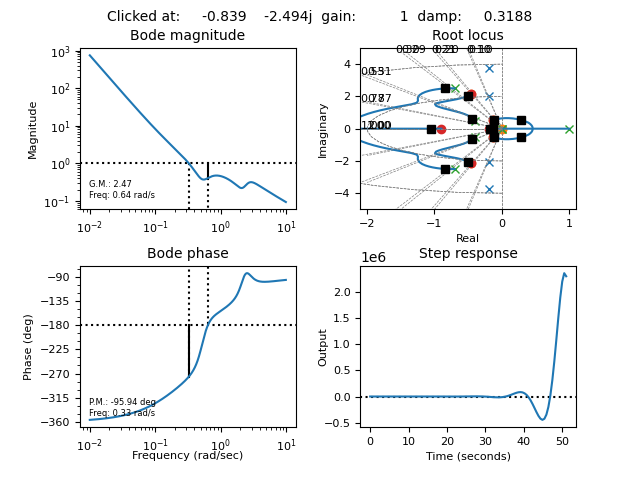

In [78]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_4, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

Assim, adotando $K_c = 18$, tem-se o seguinte compensador PID:


In [79]:
K_c_PID = 18
N_d = 1000

G_c_PID = K_c_PID * (1 + 1/(T_i * s) + (T_d * s)/(1 + T_d * s/N_d))
G_c_PID

TransferFunction(array([108108.        , 117016.61538462,  18000.        ]), array([6.0e+00, 6.5e+03, 0.0e+00]))

Diagrama de Bode do compensador PID sintetizado

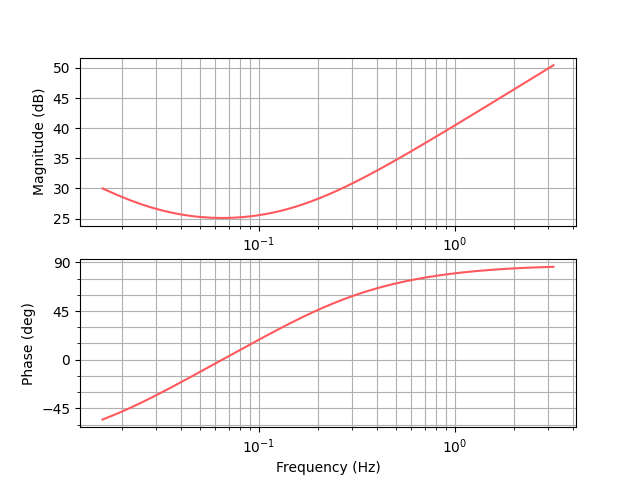

In [80]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PID,
                                omega=np.linspace(0.1, 20, 1001),
                                color=cp['red'],
                                dB=True, Hz=True)

#### 3.4. Síntese de um compensador PD

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-derivativo* (PD), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PD}}(s) = \left( K_p + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & D(s) + K_p N(s) + K_d s N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s N(s)}{D(s) + K_p N(s)}}_{\displaystyle L_5(s)} = 0
\end{align*}

In [81]:
L_5 = (s * N)/(D + K_p * N)
L_5

TransferFunction(array([1.        , 1.18432892, 5.34342833, 1.51884011, 1.34130257,
       0.        ]), array([ 1.        ,  1.2       , 19.07      , 13.09227602, 66.26196835,
       16.98152139, 17.43693342]))

Lugar das raízes de $L_5(s)$ e ajuste de $K_d$

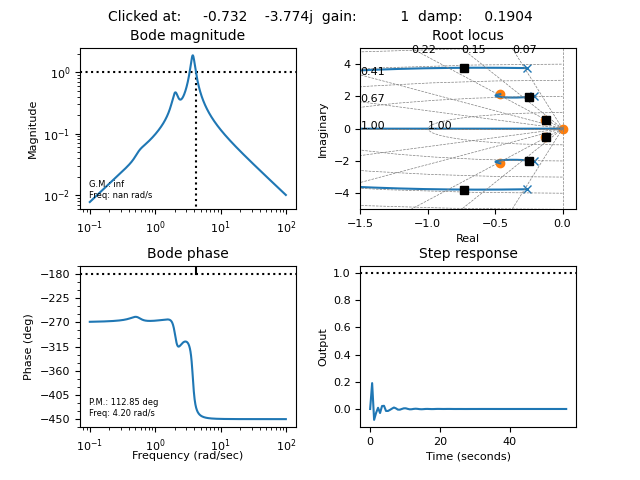

Clicked at    -0.5084    +3.823j gain     0.5235 damp     0.1318
Clicked at     -1.213    +3.823j gain      1.989 damp     0.3025
Clicked at     -0.449    +2.025j gain       8.56 damp     0.2165
Clicked at     -0.449    +1.901j gain      5.524 damp     0.2298
Clicked at    -0.4787    +2.025j gain      10.06 damp       0.23
Clicked at   -0.05211   +0.5999j gain      3.174 damp    0.08653
Clicked at   -0.09071   +0.5615j gain      4.965 damp     0.1595
Clicked at    -0.1153   +0.5231j gain      12.94 damp     0.2152
Clicked at    -0.0752    +0.577j gain      3.968 damp     0.1292
Clicked at    -0.0752    +0.577j gain      3.968 damp     0.1292
Clicked at    -0.0752    +0.577j gain      3.968 damp     0.1292
Clicked at    -0.0752    +0.577j gain      3.968 damp     0.1292
Clicked at    -0.1068   +0.5367j gain      8.298 damp     0.1951
Clicked at    -0.1068   +0.5367j gain      8.298 damp     0.1951


In [82]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_5, xlim_rlocus=(-1.5, 0.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_5(s)$, chega-se a $K_d = 4 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [83]:
K_d = 8
T_d = K_d/K_p
T_d

0.6153846153846154

Finalmente, assumindo os valor calculado para $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PD}}(s) = K_c \left(1 + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 +  K_c \underbrace{\frac{\left(1 + T_d s \right) N(s)}{D(s)}}_{\displaystyle L_6(s)} = 0
\end{align*}

In [86]:
L_6 = ((1 + T_d * s) * N)/D
L_6

TransferFunction(array([0.61538462, 1.7288178 , 4.47259252, 6.27809917, 2.34425707,
       1.34130257]), array([ 1.    ,  1.2   ,  6.07  , -2.304 , -3.2026, -2.7634,  0.    ]))

Lugar das raízes de $L_6(s)$ e ajuste fino de $K_c$

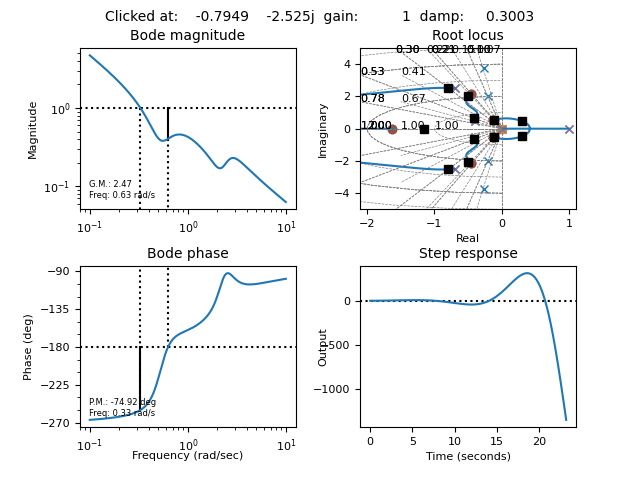

In [87]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_6, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

Assim, adotando $K_c = 10, tem-se o seguinte compensador PD:


In [55]:
K_c_PD = 10
N_d = 1000

G_c_PD = K_c_PD * (1 + (T_d * s)/(1 + T_d * s/N_d))
G_c_PD

TransferFunction(array([ 8897.77777778, 10000.        ]), array([8.88888889e-01, 1.00000000e+03]))

Diagrama de Bode do compensador PD sintetizado

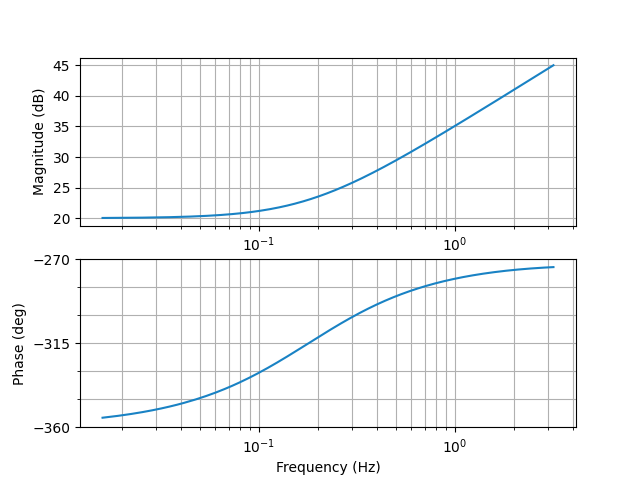

In [88]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PD,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['blue'],
                                   dB=True, Hz=True)

### 4. Análise das respostas em malha fechada com compensadores PI, PD e PID

#### 4.1. Função de transferência entre referência (r) e saída (c)

In [89]:
rc_tf_PI = ct.feedback(G_c_PI * L_0)
rc_tf_PD = ct.feedback(G_c_PD * L_0)
rc_tf_PID = ct.feedback(G_c_PID * L_0)
rc_tf_PID

TransferFunction(array([ 4026244.6224    ,  9126424.36820043, 27345656.72249915,
       30195962.6343329 , 15601633.74095629,  6863617.46914016,
         899169.54102189]), array([2.23456800e+02, 2.42346348e+05, 4.31809485e+06, 1.05953242e+07,
       2.67871929e+07, 2.94200655e+07, 1.49326748e+07, 6.86361747e+06,
       8.99169541e+05]))

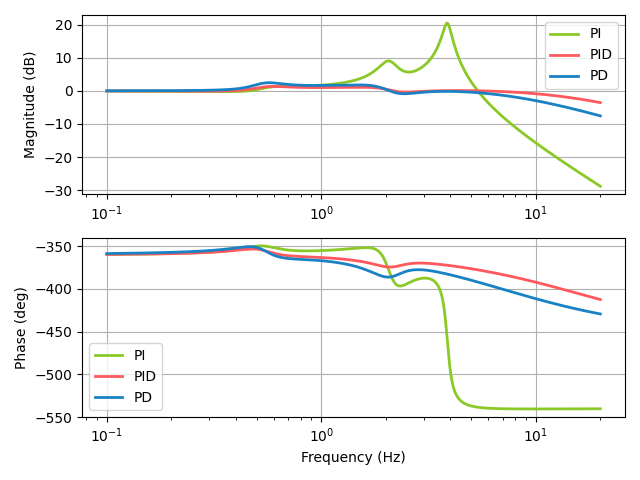

In [90]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.2. Função de transferência entre referência (r) e entrada de controle (u)

In [91]:
ru_tf_PI = ct.feedback(G_c_PI, L_0)
ru_tf_PD = ct.feedback(G_c_PD, L_0)
ru_tf_PID = ct.feedback(G_c_PID, L_0)
ru_tf_PID

TransferFunction(array([  4026244.6224    ,   9189519.95032603,  30339306.94210313,
        17981197.13890857, -18866195.53323521, -26627673.15081297,
       -14189898.4063218 ,  -1852501.56335987,         0.        ]), array([2.23456800e+02, 2.42346348e+05, 4.31809485e+06, 1.05953242e+07,
       2.67871929e+07, 2.94200655e+07, 1.49326748e+07, 6.86361747e+06,
       8.99169541e+05]))

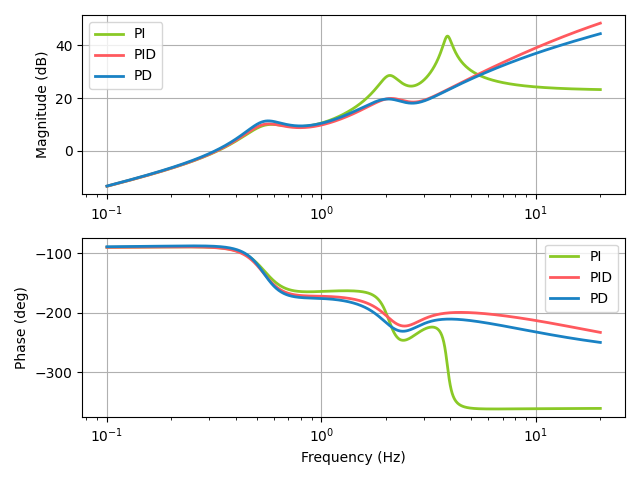

In [92]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    ru_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    ru_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    ru_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.3. Resposta a degrau

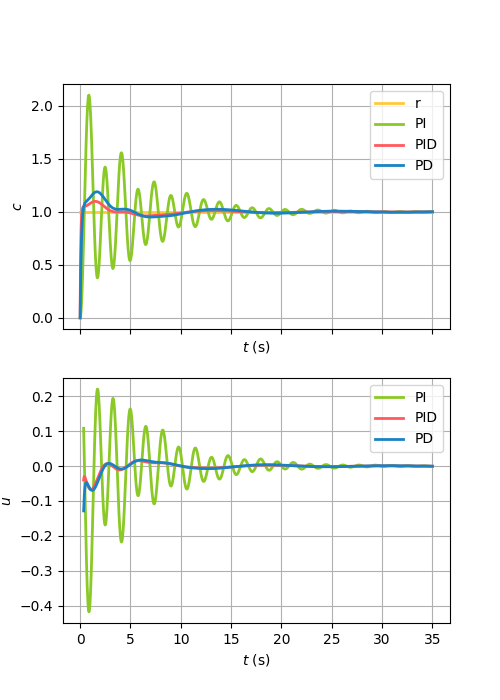

In [95]:
# simulação do sistema em MF
ts = np.linspace(0, 35, 1000)

t, y_PI = ct.step_response(rc_tf_PI, ts)
t, u_PI = ct.step_response(ru_tf_PI, ts)

t, y_PID = ct.step_response(rc_tf_PID, ts)
t, u_PID = ct.step_response(ru_tf_PID, ts)

t, y_PD = ct.step_response(rc_tf_PD, ts)
t, u_PD = ct.step_response(ru_tf_PD, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t[10:], u_PI[10:]/K_l0, color=cp['green'], 
                   label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:]/K_l0, color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:]/K_l0, color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 4.4. Resposta a rampa

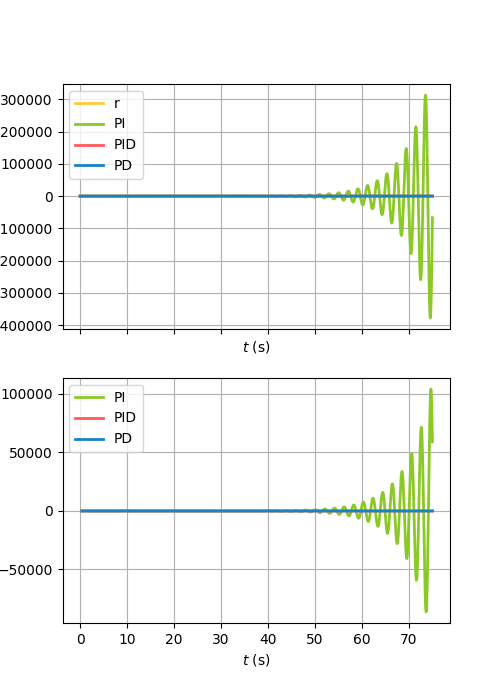

In [62]:
# simulação do sistema em MF
ts = np.linspace(0, 75, 2000)

t, y_PI = ct.forced_response(rc_tf_PI, ts, U=ts)
t, u_PI = ct.forced_response(ru_tf_PI, ts, U=ts)

t, y_PID = ct.forced_response(rc_tf_PID, ts, U=ts)
t, u_PID = ct.forced_response(ru_tf_PID, ts, U=ts)

t, y_PD = ct.forced_response(rc_tf_PD, ts, U=ts)
t, u_PD = ct.forced_response(ru_tf_PD, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:]/K_l0, color=cp['green'],
                #    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:]/K_l0, color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:]/K_l0, color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()